#Framework pour la création d'un modèle de classification audio

EALCMG: Easy African Language Classification Model Generator


1. Modèle pré-entrainé utilisé : distillHubert
*  Description: Ce Modèle est issue de la distillation du modèle Hubert .
* Lien : https://huggingface.co/ntu-spml/distilhubert
*Bon à savoir :Taux déchantillonage à 16 kHz

2. Utilité de ce framework :
 Ce framework permet d'entrainer rapidement un modèle de pour des tâches de classification audio : classification de langue,reconnaissance d'un mot clé ou de phrase clés,etc , par le simple respect d'une bonne organisation des fichiers audios du dataset.

3. Ressources
* Stockage utilisé : google drive
* Plateforme de calcule utilisé : google colab

4. Licence :
 Vous pouvez le modifier à votre convenance . Nous ne sommes pas responsable de ce que vous faites de ce framework , ni des dommages qu'il pourrait vous causer

5. Auteur :
 Foupouagnigni Mowoum Mouhammad Nassair GI25 ENSPY (foupouagnignimowoum@gmail.com)
 Laboratoire de recherche UMMISCO CAMEROUN

Cameroun, Yaounde , May2025

#REQUIEREMENTS

> En cas de problème de version des outils utilisés dans le code




**REQUIEREMENTS**
see the requierements.txt file

#Partie 1 : Structuration Dataset

Partie 1 : Structuration du dataset

Le bon fonctionnement du Framework repose sur une bonne structuration du dataset

Supposons vous vouliez faire un classifieur de la langue A et B.

votre dossier contenant les dossiers des audios de la langue A et de la langue B doivent :
1. Etre dans le même dossier : /Data/.
2. Les audios de la langue A doivent être dans le dossier nommé A , et à l'intérieur y figure les audios de la langue A.
3. De même pour les audios de la langue B .
4. N'oubliez pas d'ajouter un readme.txt , pour donner les informations contextuelles de ce dataset : origine ,proportions ...
5. Vous adopterez le même cheminement pour plus de 02 langues
6. Une fois votre dataset bien structuré , sauvegardez le dans votre google drive

**Attention**:
1. Aux noms des dossiers :Ayez des noms courts ,sans espaces ni caractère spéciaux sauf (underscore : "_" ).Ces noms serviront automatiquement à étiqueter les données lors de l'entrainement
2. Longueur des audios  : Nous vous recommendons d'avoir des longueurs d'audios d'enrivon 30 secondes auquel cas ils seront tronqués
3. Format des audios : Nous recommendons d'avoir des .mp3 ou .wav
4. lors de l'utilisation de ce framework , les audios seront automatiquements renommés




*** Aperçu de notre dataset dans google drive***


---
---
---
Image 1 : Vu du dossier dataset
---
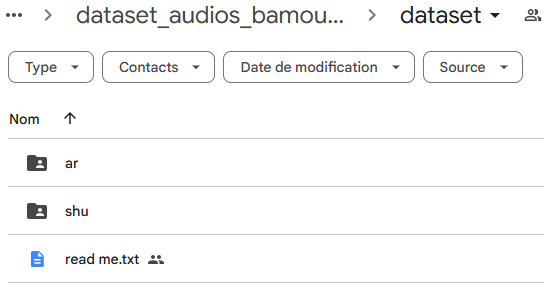
---
---
---
Image 2 : vue d'un dossier d'une langue
---

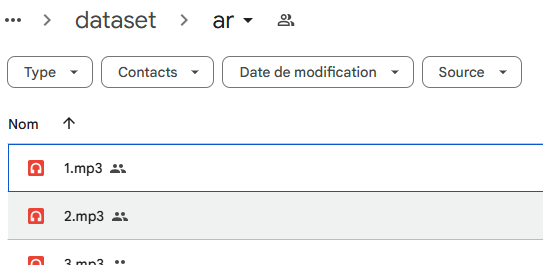


# Partie 2 : Installation des dépendances


Partie 2 : Installation des dépendances

Nous utilisons plusieurs outils dans ce framework


1.   datasets :manipulation de datasets
2.   pd(pandas):        manipulation des données tabulaires en python
3.   Pydub : conversion des fichiers audios
4.   Gradio : interface graphique de manipulation et visualisation de données
5.   Wandb :  Visualisation des paramètres lors de l'entrainement
6.   Evaluate: Metrique d'évaluation du modèle



In [ ]:
#Installation de  dépendance  datasets qui sera utilisé pour manipulé notre dataset
!pip install datasets

In [ ]:
#installation de dépendance : pandas pour les calculs
!pip install pd

In [ ]:
#Installation de dépendance : pydub , pour la conversion des fichiers audios
!pip install pydub

In [ ]:
#Installation de gradio pour avoir une interface graphique de visualisation  des données et tests
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 136.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.5 MB/s eta 0:00:00


In [ ]:
#Installation de dépendance : Wandb pour la visualisation des logs de l'entrainement
!pip install wandb


In [ ]:
#Installation de dépendance : Evaluate pour les métriques d'évaluation du modèle
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.8 MB/s eta 0:00:00


# Partie 3 : Montage de google drive &Connection Hugging Face & chemin d'accès vers le dataset

Nous utilisons google drive comme stockage externe pour les fichiers audios de notre dataset.

In [ ]:
#Montage de notre stockage cloud google drive sur lequel se trouve nos données
from google.colab import drive

# 1. Monter Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# connection à la plateforme Hugging face pour avoir accès au modèle pré entrainés du Hub
from huggingface_hub import notebook_login

print("Connection au hub de hugging face pour avoir accès au modèle  utilisé pour le finetuning")
print("Assurez vous d'y avoir un compte valide")
print("")
notebook_login()

Connection au hub de hugging face pour avoir accès au modèle  utilisé pour le finetuning
Assurez vous d'y avoir un compte valide



## Variables d'environnements globales

In [22]:
import os
#Notebook Curent Directory
notebook_current_directory = os.getcwd()
print("le repertoire courant de votre notebook est : "+ notebook_current_directory)

le repertoire courant de votre notebook est : /content


In [23]:
#chemin d'accès vers le dataset
root_path = input("Veuillez entrer le chemin d'accès du dossier /generateur_modele_classification_audio du framework")
print("votre dossier /generateur_modele_classification_audio se trouve à l'emplacement \n "+root_path)


dataset_path=root_path+"/data"
#output path
output_path=root_path + "/generated_models"

Veuillez entrer le chemin d'accès du dossier /generateur_modele_classification_audio du framework/content/gdrive/MyDrive/UMMISCO_ENSPY_stage_mowoum_foupouagnigni/Framework final/generateur_modele_classification_audio
votre dossier /generateur_modele_classification_audio se trouve à l'emplacement 
 /content/gdrive/MyDrive/UMMISCO_ENSPY_stage_mowoum_foupouagnigni/Framework final/generateur_modele_classification_audio


# Partie 4 : Augmentation des données  verticale



Vous pourrez utiliser les fonctions mises à votre disposition pour faire d l'augementation des données.
1. Variation de la vitesse de la voix
2. Variation du Volume de la Voix  

**Attention** : N'appliquez cettre partie que lorsque vous estimer ne pas avoir suffisament de données Vous pourrez utiliser les fonctions mises à votre disposition pour faire d l'augementation des données.
1. Variation de la vitesse de la voix
2. Vairation du Volume de la Voix  

**Attention** : N'appliquez cettre partie que lorsque vous estimer ne pas avoir suffisament de données

In [ ]:
# Augmentation des fichiers audios pour enrichir le dataset

# variation de la vitesse de la voix
import os
from pydub import AudioSegment
from pydub.playback import play

def change_audio_speed(cpt,input_file, output_file, speed_factor):
    try:
        audio = AudioSegment.from_file(input_file)

        # Vérifiez si l'audio est vide
        if len(audio) == 0:
            print(f"Le fichier {input_file} est vide ou illisible.")
            return

        # Vérifiez si l'audio est trop court (recommandation pydub)
        min_duration_ms = 20  # Valeur recommandée par pydub (peut être ajustée)
        if len(audio) < min_duration_ms:
            print(f"Ignored '{input_file}': trop court ({len(audio)}ms) pour le changement de vitesse.")
            return

        new_audio = audio.speedup(playback_speed=speed_factor)
        new_audio.export(output_file, format="mp3")
        print(f"{cpt} New audio generated from {os.path.basename(input_file)} with speed {speed_factor}")

    except Exception as e:
        print(f"Error processing '{os.path.basename(input_file)}': {e}")

def change_audio_speed_dir(directory, speed, suffix_name):

    for subdir, _, files in os.walk(directory):
        cpt=0
        print("Nous sommes dans le dossier " + subdir)
        for filename in files:
            cpt+=1
            if "speed" in filename or ".csv" in filename or ".txt" in filename:
                continue
            if filename.endswith(('.mp3', '.wav')):
                name, extension = os.path.splitext(filename)
                input_file = os.path.join(subdir, filename)
                output_file = os.path.join(subdir, name + suffix_name + extension)
                change_audio_speed(cpt,input_file, output_file, speed)

if __name__ == "__main__":
    print("Augmentation des données par augmentation vocal : variation de la vitesse de la voix")
    print("Une fois actionné , l'ensemble de votre dataset sera pris en compte pour la génération de ces données")
    print("les valeurs de la vitesse varient entre 0 et 4 ")
    print(" 0 correspond à x(-2) , \n 1 correspond à x(1) et 2 à x(2) de la vitesse initiale de l'audio")
    speed = float(input("Entrez la vitesse de la voix que vous voulez  , nous vous recommandons entre 1.2 et 1.5 pour rester audible: "))
    print("")
    print("Début de l'Augmentation Verticale par variation de la vitesse de la voix")
    speed_str = str(speed).replace(".", "_")  # Remplacer tous les points par des underscores
    filenames_suffix = "_speeded_" + speed_str  # Utiliser comme suffixe pour éviter écrasement
    change_audio_speed_dir(dataset_path, speed, filenames_suffix)
    print("Fin de l'Augmentation Verticale par variation de la vitesse de la voix")

Augmentation des données par augmentation vocal : variation de la vitesse de la voix
Une fois actionné , l'ensemble de votre dataset sera pris en compte pour la génération de ces données
les valeurs de la vitesse varient entre 0 et 4 
 0 correspond à x(-2) , 
 1 correspond à x(1) et 2 à x(2) de la vitesse initiale de l'audio
Entrez la vitesse de la voix que vous voulez  , nous vous recommandons entre 1.2 et 1.5 pour rester audible: 1.2

Début de l'Augmentation Verticale par variation de la vitesse de la voix
Nous sommes dans le dossier /content/gdrive/MyDrive/UMMISCO_ENSPY_stage_mowoum_foupouagnigni/Framework final/generateur_modele_classification_audio/data
Nous sommes dans le dossier /content/gdrive/MyDrive/UMMISCO_ENSPY_stage_mowoum_foupouagnigni/Framework final/generateur_modele_classification_audio/data/shu
1 New audio generated from 714.mp3 with speed 1.2
2 New audio generated from 715.mp3 with speed 1.2
3 New audio generated from 716.mp3 with speed 1.2
4 New audio generated from

In [ ]:
# Augmentation des données : Variation du volume de la voix
import os
from pydub import AudioSegment


# variation du volume dans la voix
def change_audio_volume(cpt,input_file,gain_db,output_file):
    try:
        # Charger l'audio
        audio = AudioSegment.from_file(input_file)

        # Limiter l'augmentation maximale du volume (en dB)
        max_increase_db = 6.0
        gain_db = min(gain_db, max_increase_db) if gain_db > 0 else gain_db

        # Modifier le volume
        new_audio = audio + gain_db  # gain_db peut être positif (augmentation) ou négatif (diminution)

        # Exporter le nouvel audio
        new_audio.export(output_file, format="mp3")
        print(f"nb:{cpt}Volume changed: '{os.path.basename(input_file)}' by {gain_db} dB")
        print(f" nb:{cpt} New audio generated from {os.path.basename(input_file)} with volume change of {gain_db} dB")

    except Exception as e:
        print(f"Error processing '{os.path.basename(input_file)}': {e}")

def change_audio_volume_dir(directory, gain_db, suffix_name):
  for subdir, _, files in os.walk(directory):
    cpt=0
    print("Nous sommes dans le dossier " + subdir)
    for filename in os.listdir(subdir):
        cpt+=1
        if "speeded" in filename or "louder" in filename or ".csv" in filename or ".txt" in filename:
            continue
        name, extension = os.path.splitext(filename)
        input_file = os.path.join(subdir, filename)
        output_file = os.path.join(subdir, name + suffix_name + extension)
        change_audio_volume(cpt,input_file,gain_db,output_file)


if __name__ == "__main__":
    print("Augmentation des données par augmentation vocal : variation du volume de la voix")
    print("Une fois actionné , l'ensemble de votre dataset sera pris en compte pour la génération de ces données sauf celles de l'augmentation par variation de  vitesse vocale précédente")
    print("les valeurs du volume varient entre -20 et +12 db ")
    loud = float(input("Entrez le volume de la voix que vous voulez  , nous vous recommandons entre 5(pour l'augmentation) et -5 pour la diminution du volume afin de  rester audible et eviter l'écrêtage"))
    print("")
    print("Début de l'Augmentation Verticale par variation du volume de la voix")
    gain_db = loud  # Utiliser directement la valeur entrée pour le gain
    gain_str = str(gain_db).replace("-", "minus").replace(".", "_")
    filenames_suffix = f"_louder_{gain_str}dB"
    change_audio_volume_dir(dataset_path, gain_db, filenames_suffix)
    print("Fin de l'Augmentation Verticale par variation du volume de la voix")

Augmentation des données par augmentation vocal : variation du volume de la voix
Une fois actionné , l'ensemble de votre dataset sera pris en compte pour la génération de ces données sauf celles de l'augmentation par variation de  vitesse vocale précédente
les valeurs du volume varient entre -20 et +12 db 
Entrez le volume de la voix que vous voulez  , nous vous recommandons entre 5(pour l'augmentation) et -5 pour la diminution du volume afin de  rester audible et eviter l'écrêtage5

Début de l'Augmentation Verticale par variation du volume de la voix
Nous sommes dans le dossier /content/gdrive/MyDrive/UMMISCO_ENSPY_stage_mowoum_foupouagnigni/Framework final/generateur_modele_classification_audio/data
Error processing 'shu': [Errno 21] Is a directory: '/content/gdrive/MyDrive/UMMISCO_ENSPY_stage_mowoum_foupouagnigni/Framework final/generateur_modele_classification_audio/data/shu'
Error processing 'ar': [Errno 21] Is a directory: '/content/gdrive/MyDrive/UMMISCO_ENSPY_stage_mowoum_foupo

# Partie 5 : Renommage fichiers & Génération metadat.csv & Chargement Dataset



1. Renommage automatique des fichiers
2. Génération de metadata.csv : Il contient le chemin d'acccès et l'étiquète de chaque fichier audio
3. Chargement du dataset et première visualisation

In [ ]:
#Renommage automatique des fichiers audios des sous dossiers du dataset
import os

def rename_files_in_subdirectories(root_directory):
    """
    Parcourt tous les sous-dossiers du répertoire racine spécifié et renomme
    les fichiers .mp3 ou .wav à l'intérieur en utilisant une numérotation séquentielle
    dans chaque sous-dossier, en évitant les collisions de noms.

    Args:
        root_directory (str): Le chemin d'accès au répertoire racine.
    """
    for subdir, _, files in os.walk(root_directory):
        print("Nous sommes dans le dossier " + subdir)
        cpt = 0
        existing_names = set()  # Garder une trace des noms déjà utilisés dans ce dossier
        for filename in files:
            if filename.endswith((".mp3", ".wav")):
                cpt += 1
                extension = ".mp3" if filename.endswith(".mp3") else ".wav"
                new_base_name = str(cpt)
                new_name = new_base_name + extension
                new_file_path = os.path.join(subdir, new_name)

                # Vérifier si le nouveau nom existe déjà
                counter = 1
                while new_name in existing_names or os.path.exists(new_file_path):
                    new_name = f"{new_base_name}_{counter}{extension}"
                    new_file_path = os.path.join(subdir, new_name)
                    counter += 1

                # Construire l'ancien chemin complet
                old_file_path = os.path.join(subdir, filename)

                # Renommer le fichier
                try:
                    os.rename(old_file_path, new_file_path)
                    existing_names.add(new_name)  # Ajouter le nouveau nom à l'ensemble des noms existants
                    print(f'Renamed: "{old_file_path}" to "{new_file_path}"')
                except OSError as e:
                    print(f'Error renaming "{old_file_path}": {e}')

if __name__ == "__main__":
    print("Renommage des fichiers en cours...")
    rename_files_in_subdirectories(dataset_path)
    print("Opération de renommage terminée.")

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Renamed: "/content/gdrive/MyDrive/UMMISCO_ENSPY_stage_mowoum_foupouagnigni/Framework final/generateur_modele_classification_audio/data/shu/442.mp3" to "/content/gdrive/MyDrive/UMMISCO_ENSPY_stage_mowoum_foupouagnigni/Framework final/generateur_modele_classification_audio/data/shu/1442.mp3"
Renamed: "/content/gdrive/MyDrive/UMMISCO_ENSPY_stage_mowoum_foupouagnigni/Framework final/generateur_modele_classification_audio/data/shu/443.mp3" to "/content/gdrive/MyDrive/UMMISCO_ENSPY_stage_mowoum_foupouagnigni/Framework final/generateur_modele_classification_audio/data/shu/1443.mp3"
Renamed: "/content/gdrive/MyDrive/UMMISCO_ENSPY_stage_mowoum_foupouagnigni/Framework final/generateur_modele_classification_audio/data/shu/444.mp3" to "/content/gdrive/MyDrive/UMMISCO_ENSPY_stage_mowoum_foupouagnigni/Framework final/generateur_modele_classification_audio/data/shu/1444.mp3"
Renamed: "/content/gdrive/MyDrive/UMMISCO_ENSPY_s

In [ ]:
#génération du fichier métadata.csv qui sera utilisé par la suite
import os
import csv

def generate_metadata_with_absolute_paths(directory):
    """
    Parcourt un dossier et génère un fichier CSV contenant les chemins absolus
    des fichiers audio et leurs labels.

    Args:
        directory (str): Le chemin d'accès au répertoire racine du dataset audio.
    """
    output_csv = directory + "/metadata.csv"
    data = []

    # Parcours des dossiers
    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        if os.path.isdir(label_path):  # Vérifie si c'est un dossier
            for filename in os.listdir(label_path):
                if filename.endswith(('.wav', '.mp3', '.flac')):  # Filtre les fichiers audio
                    file_path = os.path.join(label_path, filename)
                    absolute_path = os.path.abspath(file_path)  # Obtient le chemin absolu
                    data.append([absolute_path, label])

    # Écriture du fichier CSV
    with open(output_csv, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["audio", "label"])  # En-tête (nom de colonne plus pertinent)
        writer.writerows(data)

    print(f"Fichier {output_csv} généré avec succès ")

if __name__ == "__main__":
  print("Début de la génération du fichier metadata.csv")
  print("veuillez patienter...")
  #génération du metadata.csv qui sera utilisé par la suite
  generate_metadata_with_absolute_paths(dataset_path)
  print("Fin de la génération du fichier voir "+dataset_path)

Début de la génération du fichier metadata.csv
veuillez patienter...
Fichier /content/gdrive/MyDrive/UMMISCO_ENSPY_stage_mowoum_foupouagnigni/Framework final/generateur_modele_classification_audio/data/metadata.csv généré avec succès 
Fin de la génération du fichier voir /content/gdrive/MyDrive/UMMISCO_ENSPY_stage_mowoum_foupouagnigni/Framework final/generateur_modele_classification_audio/data


In [8]:
from datasets import Dataset, Audio
import pandas as pd
import os

# --- Your existing setup ---
metadata_path = os.path.join(dataset_path, "metadata.csv")
AUDIO_COLUMN_NAME = "audio" # As confirmed
LABEL_COLUMN_NAME = "label" # As confirmed

print(f"CHECKPOINT: Chemin du fichier metadata: {metadata_path}")

print("Chargement du dataset en cours via Pandas...")

try:
    # 1. Load the CSV into a Pandas DataFrame
    df = pd.read_csv(metadata_path)
    print("CHECKPOINT: CSV chargé dans un DataFrame Pandas.")

    # 2. Convert the Pandas DataFrame to a Hugging Face Dataset
    #    This creates a 'Dataset' object, usually in the 'train' split by default.
    dataset = Dataset.from_pandas(df)
    print("CHECKPOINT: DataFrame converti en Hugging Face Dataset.")

    print("Chargement du dataset terminé.")

    # 3. Cast the 'audio' column to the Audio feature type
    #    This is essential for loading the actual audio data.
    #    Make sure the paths in your CSV are relative to where you expect them,
    #    or absolute. If they are relative, you might need to prepend `dataset_path`.
    #    Assuming the paths in your CSV are absolute or relative to the Colab environment's root.
    #    If your audio paths are like 'audio_files/clip1.wav' and your `dataset_path` is the parent of `audio_files`,
    #    you might need to adjust paths.
    #    For simplicity, assuming paths in CSV are directly loadable by `Audio()`.
    dataset = dataset.cast_column(AUDIO_COLUMN_NAME, Audio())
    print(f"CHECKPOINT: Colonne '{AUDIO_COLUMN_NAME}' castée en type Audio.")

    # 4. Display a sample
    print("\naperçu du premier échantillon après casting (devrait inclure 'array' et 'sampling_rate' pour l'audio):")
    print(dataset[0]) # Access directly since it's a single Dataset object now

    print("\nLe dataset est maintenant prêt avec les fichiers audio chargés.")

except FileNotFoundError:
    print(f"ERREUR: Le fichier metadata.csv n'a pas été trouvé à l'emplacement: {metadata_path}")
    print("Veuillez vérifier que le chemin est correct et que le fichier existe.")
except Exception as e:
    print(f"UNE ERREUR EST SURVENUE: {e}")

CHECKPOINT: Chemin du fichier metadata: /content/gdrive/MyDrive/UMMISCO_ENSPY_stage_mowoum_foupouagnigni/Framework final/generateur_modele_classification_audio/data/metadata.csv
Chargement du dataset en cours via Pandas...
CHECKPOINT: CSV chargé dans un DataFrame Pandas.
CHECKPOINT: DataFrame converti en Hugging Face Dataset.
Chargement du dataset terminé.
CHECKPOINT: Colonne 'audio' castée en type Audio.

aperçu du premier échantillon après casting (devrait inclure 'array' et 'sampling_rate' pour l'audio):
{'audio': {'path': '/content/gdrive/MyDrive/UMMISCO_ENSPY_stage_mowoum_foupouagnigni/Framework final/generateur_modele_classification_audio/data/shu/714.mp3', 'array': array([0.00078531, 0.00099987, 0.00096943, ..., 0.15145525, 0.11721838,
       0.06566221]), 'sampling_rate': 48000}, 'label': 'shu'}

Le dataset est maintenant prêt avec les fichiers audio chargés.


# Partie 6 : Visualisation Audio du dataset Avec Gradios

In [3]:
#lancement de gradios pour écouter un audio du dataset d'entrainement  ayant donné le numéro en entrée
import gradio as gr
from datasets import load_dataset, Audio

# Assurer que la colonne "file" est bien traitée comme audio
#dataset = dataset.cast_column("audio", Audio(sampling_rate=16000))
print(" Ecoute des fichiers audios")
print(f"Nombre total d'exemples : {len(dataset)}")

# Afficher un exemple pour vérifier le chargement
#print(dataset["train"][200])

# Fonction pour récupérer l'audio et son label
def get_audio(index):
  if index < 0 or index >= len(dataset):
    return "Index invalide", "Index invalide"
  else:
    example = dataset[int(index)]

    # Récupérer uniquement le chemin du fichier audio
    audio_path = example["audio"]["path"]
    label = example["label"]

    return audio_path, label

print("Entrez l'index de l'audio que vous voulez écouter  ")
# Interface Gradio
demo = gr.Interface(
    fn=get_audio,
    inputs=gr.Number(label="Index de l'exemple"),
    outputs=[gr.Audio(type="filepath"), gr.Textbox(label="Label associé")],
    title="Écoute des exemples audio de votre dataset"
)
demo.launch(debug=True)

 Ecoute des fichiers audios
Nombre total d'exemples : 6439
Entrez l'index de l'audio que vous voulez écouter  
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://549e57a17c35a2ad34.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://549e57a17c35a2ad34.gradio.live


# Partie 7 : Etiquetage des Automatique des données

In [9]:
#recupereration automatique des étiquètes du fichier metadata.csv
import pandas as pd

def get_unique_words_from_column(csv_filepath, column_name):
    """
    Inspecte une colonne d'un fichier .csv, récupère et retourne une liste
    contenant tous les mots différents (uniques) qui y figurent.

    Args:
        csv_filepath (str): Le chemin d'accès au fichier .csv.
        column_name (str): Le nom de la colonne à inspecter.

    Returns:
        list: Une liste contenant tous les mots uniques trouvés dans la colonne.
              Les mots sont convertis en minuscules pour l'unicité.
              Retourne une liste vide en cas d'erreur de lecture du fichier
              ou si la colonne n'existe pas.
    """
    try:
        df = pd.read_csv(csv_filepath)
        if column_name not in df.columns:
            print(f"Erreur: La colonne '{column_name}' n'existe pas dans le fichier CSV.")
            return []

        text_series = df[column_name].astype(str)  # S'assurer que les données sont traitées comme des chaînes
        all_words = []
        for text in text_series:
            words = text.lower().split()  # Convertir en minuscules et séparer les mots
            all_words.extend(words)

        unique_words = sorted(list(set(all_words)))  # Obtenir les mots uniques et les trier
        return unique_words

    except FileNotFoundError:
        print(f"Erreur: Le fichier CSV '{csv_filepath}' n'a pas été trouvé.")
        return []
    except Exception as e:
        print(f"Une erreur s'est produite lors de la lecture du fichier CSV: {e}")
        return []


if __name__ == "__main__":
    csv_file = metadata_path
    column_to_inspect = "label"
    unique_word_list = get_unique_words_from_column(csv_file, column_to_inspect)
    i=0
    if unique_word_list:

        print(f"Nombre de classe détecté {len(unique_word_list)} ")
        for word in unique_word_list:
            print("classe ",{i}," ",{word})
            i+=1


Nombre de classe détecté 2 
classe  {0}   {'ar'}
classe  {1}   {'shu'}


In [10]:
#Assignation automatique des étiquètes(labels) à leurs identifiants
from datasets import Dataset

def assign_ids_to_labels(dataset: Dataset, label_list: list):
    """
    Attribue des IDs aux labels d'un Dataset Hugging Face en fonction d'une liste de labels.

    Args:
        dataset (Dataset): Le Dataset Hugging Face à modifier.
        label_list (list): Une liste des noms de labels dans l'ordre souhaité pour l'attribution des IDs.

    Returns:
        Dataset: Le Dataset avec la colonne 'label' mise à jour contenant les IDs.
    """
    label_to_id = {label: i for i, label in enumerate(label_list)}

    def map_labels_to_ids(example):
        if example["label"] in label_to_id:
            return {"label": label_to_id[example["label"]]}
        else:
            return {"label": -1}  # Ou une autre valeur pour les labels inconnus

    dataset = dataset.map(map_labels_to_ids)
    return dataset

if __name__ == "__main__":
    print("N'EXECUTEZ CETTE CELLULE QU'UNE SEULE FOIS")
    print("Initialement les labels du dataset sont en lettres , ceci n'est pas compréhensible par le modèle")
    print("Dans cette section , nous faisons donc correspondre aux labels lettres des identifiants compréhensibles par le modèle")
    print("L'identifiant d'une classe correspond au numéro de sa classe")
    print("")
    print("Apperçu du résultat de l'audio 1 du dataset.")
    print("Vérifier que  le label correspond à l'identifiant de la classe")
    print("-1 correspond au label inconnu , ou si vous executer cette cellule plus d'une fois successivement.")
    print("")

    labels = unique_word_list
    dataset = assign_ids_to_labels(dataset, labels)
    print(dataset[0])


n'executez cette cellule qu'une seule fois
Initialement les labels du dataset sont en lettres , ceci n'est pas compréhensible par le modèle
Dans cette section , nous faisons donc correspondre aux labels lettres des identifiants compréhensibles par le modèle
L'identifiant d'une classe correspond au numéro de sa classe

Apperçu du résultat de l'audio 1 du dataset.
Vérifier que  le label correspond à l'identifiant de la classe
-1 correspond au label inconnu , ou si vous executer cette cellule plus d'une fois successivement.



Map:   0%|          | 0/6439 [00:00<?, ? examples/s]

{'audio': {'path': '/content/gdrive/MyDrive/UMMISCO_ENSPY_stage_mowoum_foupouagnigni/Framework final/generateur_modele_classification_audio/data/shu/714.mp3', 'array': array([0.00078531, 0.00099987, 0.00096943, ..., 0.15145525, 0.11721838,
       0.06566221]), 'sampling_rate': 48000}, 'label': 1}


# Partie 8 : Separation du dataset en  bloc entrainement et bloc test

In [13]:
# Séparation du dataset en deux
if __name__ == "__main__":
  print("Choix du pourcentage des données de tests")
  print("Le reste sera alloué à l'entrainement")
  print("Nous vous recommendons 20 ce qui correspond à 20% des données dédiées au test")
  taille_test=int(input())
  dataset=dataset.train_test_split(seed=42, shuffle=True, test_size=taille_test/100)
print("Bravoooo! ")
print("Votre dataset a cette nouvelle répartition")
dataset

Choix du pourcentage des données de tests
Le reste sera alloué à l'entrainement
Nous vous recommendons 20 ce qui correspond à 20% des données dédiées au test
20
Bravoooo! 
Votre dataset a cette nouvelle répartition


DatasetDict({
    train: Dataset({
        features: ['audio', 'label'],
        num_rows: 5151
    })
    test: Dataset({
        features: ['audio', 'label'],
        num_rows: 1288
    })
})

# Partie 9 : Chargement fintuneur & Echantillonage & mappage Ids labels & Normalisation (...,définition longueur d'un audio et troncature) du  Dataset






1. Chargement du modèle de finetuning
2. Ajustement Automatique de l'échantillonage du dataset selon celui du modèle
5. Mappage automatique entre les label  et id
6. Normalisation du dataset , définition de la durée maximale de chaque audio



In [14]:
#chargmenent du modèle d'extraction des caractéristiques audio : distilhubert , à partir du hub de Hugging face
import torch
from transformers import AutoFeatureExtractor
model_id = "ntu-spml/distilhubert"
feature_extractor = AutoFeatureExtractor.from_pretrained(
    model_id, do_normalize=True, return_attention_mask=True
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/214 [00:00<?, ?B/s]

Si vous rencontrer cette erreur :  module functions cannot set METH_CLASS or METH_STATIC , redemarrer tout simplement votre session d'execution

In [15]:
#verification du taux d'échantillonage du modèle pré entrainé:
from datasets import Audio

print("Ajustement automatique du taux d'échantillonage du dataset")
print("")
sampling_rate = feature_extractor.sampling_rate
print(" Taux echantillonage du modèle: ",{sampling_rate})
#verification de l'échantillonage
#Les données audio du dataset doivent avoir le mm  taux d'écahtillonage que le modèle pré entrainé .
#ajustement du taux déchantillonage du dataset à celui du modèle
dataset = dataset.cast_column("audio", Audio(sampling_rate=sampling_rate))
print("échantillonage uniforme effectué sur tout le dataset")
#courte vérification
dataset["train"][0]
dataset["test"][0]

Ajustement automatique du taux d'échantillonage du dataset

 Taux echantillonage du modèle:  {16000}
échantillonage uniforme effectué sur tout le dataset


{'audio': {'path': '/content/gdrive/MyDrive/UMMISCO_ENSPY_stage_mowoum_foupouagnigni/Framework final/generateur_modele_classification_audio/data/shu/990.mp3',
  'array': array([ 0.        ,  0.        ,  0.        , ..., -0.00069667,
         -0.00106297, -0.00117816]),
  'sampling_rate': 16000},
 'label': 1}

In [16]:
#mappage autoatique entre les label  et id dans l'objet model qui portera le model final
def create_label_mappings(label_list: list):
    """
    Crée des dictionnaires de correspondance id2label et label2id
    en fonction d'une liste de labels, en respectant l'ordre d'apparition.

    Args:
        label_list (list): Une liste des noms de labels.

    Returns:
        tuple: Un tuple contenant deux dictionnaires :
               - id2label (dict): Un dictionnaire où les clés sont les IDs (entiers à partir de 0)
                                  et les valeurs sont les noms des labels.
               - label2id (dict): Un dictionnaire où les clés sont les noms des labels
                                  et les valeurs sont les IDs correspondants.
    """
    id2label = {i: label for i, label in enumerate(label_list)}
    label2id = {label: i for i, label in enumerate(label_list)}
    return id2label, label2id

if __name__ == "__main__":
    print("Assignation automatique ids to labels")
    print("cette opération permet au modèle de donner en sortie des prédictions correspondantes aux valeurs des ids")
    labels =unique_word_list
    id_to_label, label_to_id = create_label_mappings(labels)
    print("")
    print("le résultat")
    print("id2label:", id_to_label)
    print("label2id:", label_to_id)


Assignation automatique ids to labels
cette opération permet au modèle de donner en sortie des prédictions correspondantes aux valeurs des ids

le résultat
id2label: {0: 'ar', 1: 'shu'}
label2id: {'ar': 0, 'shu': 1}


In [17]:
#mappage entre les label  et id dans l'objet model qui portera le model final
from transformers import AutoModelForAudioClassification

print("lancement effectif du mappage")
print("")

num_labels = len(label_to_id)

model = AutoModelForAudioClassification.from_pretrained(
    model_id,
    num_labels=num_labels,
    label2id=label_to_id ,
    id2label=id_to_label,
)

print("")
print("fin du mappage")

lancement effectif du mappage



config.json:   0%|          | 0.00/1.30k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/94.0M [00:00<?, ?B/s]

Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at ntu-spml/distilhubert and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



fin du mappage


In [18]:
#fonction de Normalisation générale du dataset pour faciliter l'entrainement
if __name__ == "__main__":
  print("Entez la durée maximale qu'un segment audio peut faire.")
  print("Nous vous recommendons 30 secondes : entrez 30.0")
  durée=float(input())
  print("Donnée bien enregistrée.")
max_duration = durée # la durée maximale d'un audio est de 30 secondes lors de la normalisation
import numpy as np

def preprocess_function(examples):
    audio_arrays = [x["array"] for x in examples["audio"]]
    inputs = feature_extractor(
        audio_arrays,
        sampling_rate=feature_extractor.sampling_rate, #taux d'échantillonage est celui du modèle d'extraction de caractéristiques
        max_length=int(feature_extractor.sampling_rate * max_duration),
        truncation=True,
        return_attention_mask=True,
    )
    return inputs

Entez la durée maximale qu'un segment audio peut faire.
Nous vous recommendons 30 secondes : entrez 30.0
30.0
Donnée bien enregistrée.


In [19]:
#lancement de l'extraction de caractéristiques avec n workers
print("Début de l'extraction des caractéristiques des audios du dataset")
print("Choix du nombre de processsus parallèle de traitement que vous pouvez lancer en fonction de vos ressources matériels")
print("Si vous n'avez aucune idée , entrez 1")
nombre_processus=int(input())
dataset_encoded = dataset.map(
    preprocess_function,
    remove_columns=["audio"],#suppression des colones audio et file à la fin de l'opération
    batched=True,
    batch_size=100,
    num_proc=nombre_processus,#utilisation de 05 processus parallèles ( déscendez plus bas si pas assez d'espace)
)

print("Fin de l'extraction des caractéristiques")

Début de l'extraction des caractéristiques des audios du dataset
Choix du nombre de processsus parallèle de traitement que vous pouvez lancer en fonction de vos ressources matériels
Si vous n'avez aucune idée , entrez 1
4


Map (num_proc=4):   0%|          | 0/5151 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/datasets/table.py:1395: FutureWarning: promote has been superseded by promote_options='default'.
  block_group = [InMemoryTable(cls._concat_blocks(list(block_group), axis=axis))]
/usr/local/lib/python3.11/dist-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by promote_options='default'.
  table = cls._concat_blocks(blocks, axis=0)


Map (num_proc=4):   0%|          | 0/1288 [00:00<?, ? examples/s]

Fin de l'extraction des caractéristiques


/usr/local/lib/python3.11/dist-packages/datasets/table.py:1395: FutureWarning: promote has been superseded by promote_options='default'.
  block_group = [InMemoryTable(cls._concat_blocks(list(block_group), axis=axis))]
/usr/local/lib/python3.11/dist-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by promote_options='default'.
  table = cls._concat_blocks(blocks, axis=0)


In [20]:
#Aperçu du dataset après encodage
print(f"Aperçu du dataset après encodage")
print("")
dataset_encoded['train'][0]


Aperçu du dataset après encodage



{'label': 1,
 'input_values': [0.0001574335474288091,
  0.00043162598740309477,
  -0.00011009704030584544,
  0.0001046214674715884,
  0.00046141946222633123,
  0.00027787391445599496,
  -0.00015218573389574885,
  -1.1705913493642583e-05,
  0.000321189989335835,
  3.339684189995751e-05,
  6.726045830873773e-05,
  -0.00015882987645454705,
  0.00035441445652395487,
  0.00018831412307918072,
  -0.0005362594965845346,
  -0.00011902456753887236,
  -2.5561132133589126e-05,
  -0.0001067037446773611,
  4.651424023904838e-05,
  0.00033108124625869095,
  0.0010448411339893937,
  0.0007161974790506065,
  -8.522249845555052e-05,
  0.00012289090955164284,
  2.3555812731501646e-05,
  7.85170414019376e-05,
  9.122321353061125e-05,
  -9.94363654172048e-05,
  0.0005502442945726216,
  0.0008308633114211261,
  0.00042191665852442384,
  0.00040960757178254426,
  0.0006820072885602713,
  0.0007192965131253004,
  0.000919442914891988,
  0.0005596957635134459,
  0.00024908222258090973,
  0.0004446344391908496

# Partie 11 : Configuration des paramètres d'entraiment , callback de visualisation, métriques d'évaluation

In [25]:
# Configuration de l'objet de configuration pour l'entrainement
from transformers import TrainingArguments

print("Veuillez entrer le nom de votre modèle.")
print("Pas d'accent, ni d'espace, ni symbole.")
print("Recommendation : un nom simple qui reflète ce pourquoi le modèle a été conçu.")
nom_model = input("nom : ")

# Assurez-vous que model_id et output_path sont définis avant ce bloc.
# Par exemple:
# model_id = "bert-base-uncased" # Remplacez par votre vrai model_id si vous en utilisez un
# output_path = "./my_model_output" # Remplacez par votre chemin de sortie

# Si model_id n'est pas défini, utilisez une valeur par défaut ou le nom que vous souhaitez
try:
    model_name = model_id.split("/")[-1]
except NameError:
    print("Avertissement: 'model_id' non défini. Utilisation d'un nom de modèle générique.")
    model_name = "base_model" # Valeur par défaut si model_id n'est pas trouvé


nom_modèle_final = f"{model_name}-{nom_model}"

training_args = TrainingArguments(
    output_dir=output_path,
    run_name=nom_modèle_final + "-run-name",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=3e-5,
    per_device_train_batch_size=8,
    gradient_accumulation_steps=2,
    per_device_eval_batch_size=16,
    num_train_epochs=10,
    warmup_ratio=0.1,
    logging_steps=10,
    eval_steps=100,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy", # Assurez-vous que cette métrique est pertinente pour votre tâche (classification audio)
    greater_is_better=True,
    fp16=True,
    optim="adamw_torch_fused",
    weight_decay=0.01,
    report_to=["tensorboard", "wandb"],
    logging_dir="./logs",
    disable_tqdm=False,
    seed=42,
    push_to_hub=False,

    # --- PARAMÈTRES POUR GARDER SEULEMENT LES MEILLEURS ET DERNIERS CHECKPOINTS ---
    # save_total_limit=1 : Le Trainer va garder le meilleur checkpoint (si load_best_model_at_end=True)
    #                      ET le dernier checkpoint (le plus récent) quand save_strategy="epoch".
    #                      Mettre 1 ici est suffisant pour cela. Si tu mettais 2, tu aurais
    #                      le meilleur, le dernier, et potentiellement un troisième temporaire.
    save_total_limit=1,
)

print(f"\nConfiguration TrainingArguments pour le modèle '{nom_modèle_final}' :\n{training_args}")

Veuillez entrer le nom de votre modèle.
Pas d'accent, ni d'espace, ni symbole.
Recommendation : un nom simple qui reflète ce pourquoi le modèle a été conçu.
nom : classifeur_Shüpamom_Arabe

Configuration TrainingArguments pour le modèle 'distilhubert-classifeur_Shüpamom_Arabe' :
TrainingArguments(
_n_gpu=1,
accelerator_config={'split_batches': False, 'dispatch_batches': None, 'even_batches': True, 'use_seedable_sampler': True, 'non_blocking': False, 'gradient_accumulation_kwargs': None, 'use_configured_state': False},
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
average_tokens_across_devices=False,
batch_eval_metrics=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_persistent_workers=False,
dataloader_pin_memory=True,
dataloader_prefetch_factor=None,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeo

In [26]:
#Définition d'un callback pour visualiser la progression lors de l'entrainement du modèle
from transformers import TrainerCallback

class RealTimeMetricsCallback(TrainerCallback):
    def on_log(self, args, state, control, logs=None, **kwargs):
        if state.is_local_process_zero:
            loss = logs.get('loss')
            accuracy = logs.get('eval_accuracy')

            loss_str = f"{loss:.4f}" if isinstance(loss, (int, float)) else "NA"
            accuracy_str = f"{accuracy:.4f}" if isinstance(accuracy, (int, float)) else "NA"

            print(f"\nStep {state.global_step} - "
                  f"Loss: {loss_str} - "
                  f"Accuracy: {accuracy_str}")

# Ajouter au Trainer
callbacks = [RealTimeMetricsCallback()]
print("Définition d'un callback pour la visualisatoin de la progression lors de l'entrainement")

Définition d'un callback pour la visualisatoin de la progression lors de l'entrainement


In [27]:
#définition de la métrique à utiliser
import evaluate
import numpy as np


print("Définition de la métrique d'évaluation des performances du modèle")

metric = evaluate.load("accuracy")
def compute_metrics(eval_pred):
    """Computes accuracy on a batch of predictions"""
    predictions = np.argmax(eval_pred.predictions, axis=1)
    return metric.compute(predictions=predictions, references=eval_pred.label_ids)

Définition de la métrique d'évaluation des performances du modèle


#Partie 12 : **Attention Lancement du finetuning**



 , dans la section suivante nous allons lancer le funetining du modèle de classification
---

1. Assurez vous d'avoir correctement executer les étapes précédentes
Nous utiliserons wandb pour la visualisation des performances du modèle en temps réelle
2. Assurez vous d'avoir déja un compte en cliquant sur le premier lien
3. Soyez attentif et confirmer la clé d'API que l'on vous demandera en cliquant sur le deuxième lien

In [28]:
#Lancement de l'entrainement
from transformers import Trainer
print("Lancement imminent du finetuning")
print("")
trainer = Trainer(
    model,
    training_args,
    train_dataset=dataset_encoded["train"],
    eval_dataset=dataset_encoded["test"],
    processing_class=feature_extractor,
    compute_metrics=compute_metrics,
    callbacks=callbacks
)
trainer.train()

print("")
print("fin du finetuning")

Lancement imminent du finetuning



<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: foupouagnignimowoum (foupouagnignimowoum-national-advanced-school-of-engenier) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin



Step 10 - Loss: 0.7016 - Accuracy: NA

Step 20 - Loss: 0.6953 - Accuracy: NA

Step 30 - Loss: 0.6739 - Accuracy: NA

Step 40 - Loss: 0.6483 - Accuracy: NA

Step 50 - Loss: 0.6084 - Accuracy: NA

Step 60 - Loss: 0.5766 - Accuracy: NA

Step 70 - Loss: 0.5288 - Accuracy: NA

Step 80 - Loss: 0.4689 - Accuracy: NA

Step 90 - Loss: 0.4171 - Accuracy: NA

Step 100 - Loss: 0.4396 - Accuracy: NA

Step 110 - Loss: 0.3465 - Accuracy: NA

Step 120 - Loss: 0.2715 - Accuracy: NA

Step 130 - Loss: 0.2031 - Accuracy: NA

Step 140 - Loss: 0.1588 - Accuracy: NA

Step 150 - Loss: 0.1120 - Accuracy: NA

Step 160 - Loss: 0.1008 - Accuracy: NA

Step 170 - Loss: 0.0827 - Accuracy: NA

Step 180 - Loss: 0.0772 - Accuracy: NA

Step 190 - Loss: 0.0731 - Accuracy: NA

Step 200 - Loss: 0.0730 - Accuracy: NA

Step 210 - Loss: 0.0876 - Accuracy: NA

Step 220 - Loss: 0.0723 - Accuracy: NA

Step 230 - Loss: 0.0674 - Accuracy: NA

Step 240 - Loss: 0.0174 - Accuracy: NA

Step 250 - Loss: 0.0163 - Accuracy: NA

Step 260

In [29]:
import datetime
#Enregistrement des informations pertinentes du modèles

output_txt = output_path+"/infos_modeles.txt"
description_dataset=input("Donner une courte description du dataSet qui a été utilisé pour finetuné ce modèle --\n, le contexte , la thématique générale du dataset et toute autre données que vous jugerez necessaire--\n")
with open(output_txt, mode='w') as file:
    now = datetime.datetime.now()
    formatted_date = now.strftime("%Y-%m-%d %H:%M:%S")
    file.write(f"--- Informations du modèle (enregistrées le {formatted_date}) ---\n")
    file.write("--- Informations utiles à savoir sur ce modèle ---\n")
    file.write(f"Nom du modèle de finetunage: {model_id}\n")
    file.write(f"Nom du modèle Finetuné: {nom_modèle_final}\n")
    file.write(f"Durée maximale d'un audio en entrée: {durée} s\n")
    file.write(f"Taux d'échantillonage: {sampling_rate} Hz\n")
    file.write("\n--- Paramètres de l'entrainement ---\n")
    file.write(str(training_args) + "\n")  # Convertir l'objet en chaîne (peut nécessiter un formatage plus précis)
    file.write("\n--- Aperçu d'un échantillon du dataset (train) ---\n")
    file.write(str(dataset["train"][0]) + "\n")  # Convertir l'objet en chaîne (peut nécessiter un formatage plus précis)
    file.write("\n--- Aperçu d'un echantillon du dataset après encodage (train) ---\n")
    encoded_sample = dataset_encoded["train"][0]
    formatted_encoded_sample = {
        "input_values": f"array({np.array2string(np.array(encoded_sample['input_values']), precision=2, separator=', ')})",
        "attention_mask": f"array({np.array2string(np.array(encoded_sample['attention_mask']), separator=', ')})" if 'attention_mask' in encoded_sample else None,
        "label": encoded_sample['label']
    }
    file.write(str(formatted_encoded_sample) + "\n")
    file.write("\n--- Labels et leurs IDs ---\n")
    file.write("id2label:"+ str(id_to_label)+ "\n")
    file.write("\n--- Description Dataset ---\n")
    file.write("description "+description_dataset+"\n")
    file.write("Fin")


print(f"Fichier {output_txt} généré avec succès")

Donner une courte description du dataSet qui a été utilisé pour finetuné ce modèle --
, le contexte , la thématique générale du dataset et toute autre données que vous jugerez necessaire--
dataset issue de la lecture du coran arabe bamoun , par deux locuteur du département du Noun , région de l'Ouest du Cameroun. Deux dossiers : un dossier contenant quelques audios du Coran en arabe , et l'autre en Bamoun(Shupamom)
Fichier /content/gdrive/MyDrive/UMMISCO_ENSPY_stage_mowoum_foupouagnigni/Framework final/generateur_modele_classification_audio/generated_models/infos_modeles.txt généré avec succès


#Partie 13 : Résultats & Test de Checkpoints & Sauvegarde

## Visualisation résultats avec gradios pour un checkpoint donné

In [30]:
#Visualisation de la prédiction d'un checkpoint donné

import torch
from transformers import AutoModelForAudioClassification, AutoFeatureExtractor
import librosa
import soundfile as sf
import numpy as np
import gradio as gr

# --- Configuration ---
nom_modèle_final =nom_modèle_final
model_id = model_id
sampling_rate = sampling_rate
id2label = id_to_label
label2id = label_to_id

# --- Chargement du modèle et du feature extractor ---
model = None
feature_extractor = AutoFeatureExtractor.from_pretrained(model_id)

# Définir le device (CPU ou GPU si disponible)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def predict_from_local_path_gradio(audio_data, model_path,checkpoint_name):
    global model
    try:
        model = AutoModelForAudioClassification.from_pretrained(model_path)
        model.to(device)
        model.eval()
        print(f"Modèle chargé depuis: {model_path}")
    except Exception as e:
        return f"Erreur lors du chargement du modèle depuis {checkpoint_name}: {e}"

    if audio_data is None:
        return "Erreur: Aucune donnée audio reçue."

    sr, audio_int16 = audio_data  # Récupérer les données audio comme int16

    print(f"Taux d'échantillonnage reçu de Gradio: {sr}")
    print(f"Forme de l'audio reçue de Gradio: {audio_int16.shape}")

    if sr != sampling_rate:
        # Convertir les données audio en float32 avant le rééchantillonnage
        audio_float32 = audio_int16.astype(np.float32) / np.iinfo(np.int16).max
        try:
            audio_resampled = librosa.resample(audio_float32, orig_sr=sr, target_sr=sampling_rate)
            print(f"Audio rééchantillonné. Nouveau SR: {sampling_rate}, Nouvelle Shape: {audio_resampled.shape}")
            audio = audio_resampled # Mettre à jour la variable audio avec les données rééchantillonnées
        except Exception as e_resample:
            return f"Erreur lors du rééchantillonnage de l'audio: {e_resample}"
    else:
        # Si le taux d'échantillonnage est correct, convertir en float pour la normalisation
        audio = audio_int16.astype(np.float32) / np.iinfo(np.int16).max

    # Normalisation (déjà fait lors de la conversion en float)
    # audio = audio.astype(np.float32) / np.max(np.abs(audio))

    max_length_seconds = max_duration
    max_length_samples = int(sampling_rate * max_length_seconds)

    inputs = feature_extractor(audio, sampling_rate=sampling_rate, return_tensors="pt", padding=True, truncation=True, max_length=max_length_samples)
    inputs = inputs.to(device)

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits

    predictions = torch.argmax(logits, dim=-1)
    predicted_label_index = predictions.item()
    predicted_label = id2label.get(predicted_label_index, "Label inconnu")
    return predicted_label

if __name__ == "__main__":

    model_path=""
    def gradio_interface(audio, checkpoint_nb):

        if not checkpoint_nb:
            return "Veuillez entrer le numéro du checkpoint."
        if audio is None:
            return "Veuillez uploader un fichier audio."

        checkpoint_name="checkpoint-"+str(checkpoint_nb)

        model_path = f"{output_path}/{checkpoint_name}"
        return predict_from_local_path_gradio(audio,model_path,checkpoint_name )

    title = "Test de Checkpoint pour la Classification Audio "
    description = """
    Chargez un checkpoint entraîné  et uploader un fichier audio pour obtenir la prédiction de la classe audio.
    Assurez-vous que le numéro du checkpoint est valide voir /generated_models .
    """.format(model_path)

    iface = gr.Interface(
        fn=gradio_interface,
        inputs=[
            gr.Audio(label="Fichier audio à tester"),
            gr.Number(label="Numéro du checkpoint à charger")
        ],
        outputs=gr.Textbox(label="Classe audio prédite"),
        title=title,
        description=description,
        live=False
    )
    iface.launch(debug=True)

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://64a41ff709b3da514b.gradio.live


#Sauvegarde d'un checkpoint

Votre modèle a déja été sauvegarder automatiquement dans le dossier /generated_models

et le checkpoint le plus pertinent a été garder .

# Génération du Fichier requierement.txt et sauvegarde dans la racine du framework

In [31]:
#Génération du fichier de versionning des dépendances
requirements_path = os.path.join(root_path, 'requirements.txt')
!pip freeze > {requirements_path}

print("Fin de la sauvegarde du fichier des dépendances global du notebook , go and check : "+ root_path)

Fin de la sauvegarde du fichier des dépendances global du notebook , go and check : /content/gdrive/MyDrive/UMMISCO_ENSPY_stage_mowoum_foupouagnigni/Framework final/generateur_modele_classification_audio


#Fin du Framework
N'hésitez pas à nous faire un retour constructif.::
Email : foupouagnignimowoum@gmail.com